In [1]:
from minutiae.features import FeatureExtractor

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import pandas as pd
import random
import numpy as np

In [3]:
BASE_PATH = Path("data/enhanced/Training/")

In [4]:
imgs = list(BASE_PATH.glob("Live/*.[bp][mn][pg]"))
len(imgs)

10366

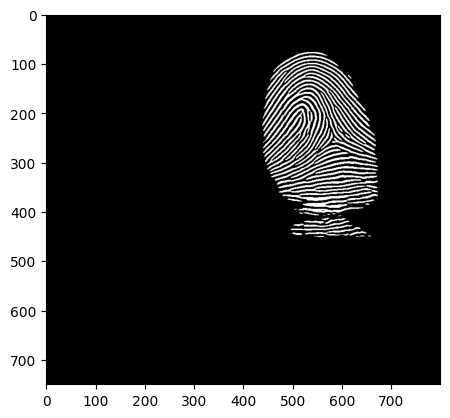

In [5]:
image = np.array(Image.open(imgs[2000]).convert('L'))
plt.imshow(image, cmap="gray")

In [6]:
imgs[2000]

PosixPath('data/enhanced/Training/Live/Time_Series_4384764_L2_3_5.bmp')

In [7]:
ex = FeatureExtractor()

In [8]:
term, biff = ex.extract_features(image)

In [32]:
import cv2 as cv
test = [cv.KeyPoint(fe.Y, fe.X, 3 ,fe.orientation[0]) for fe in term]
test.extend([cv.KeyPoint(fe.Y, fe.X, 5 ,fe.orientation[0]) for fe in biff])

In [33]:
img_min=cv.drawKeypoints(image*100,test,image*100)

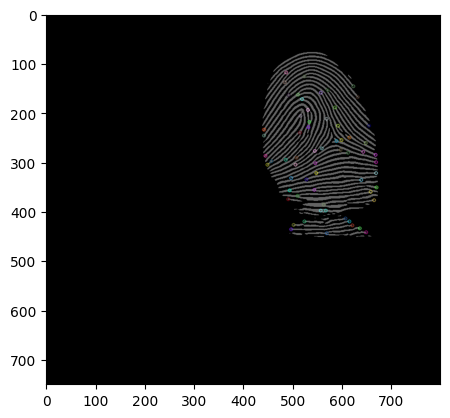

In [34]:
plt.imshow(img_min)

In [35]:
sift = cv.SIFT_create()
kp, des = sift.compute(image, test)
len(des)

64

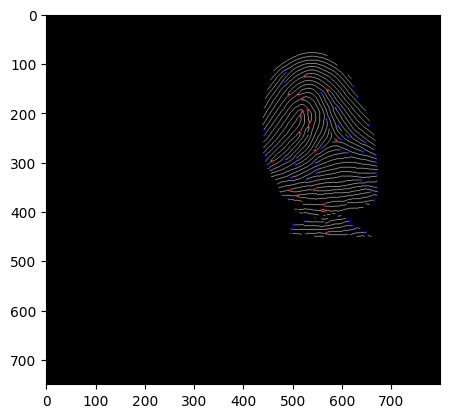

In [36]:
disp = ex.show_results(image)
plt.imshow(disp)